In [1]:
import numpy as np
import pandas as pd

In [2]:
mri_csv = pd.read_csv('archive/oasis_longitudinal.csv')

mri_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [4]:
mri_csv.head(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
mri_csv.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [6]:
male = mri_csv[mri_csv['M/F'] == 'M']
male['Group'].replace('Converted', 'Demented', inplace=True)

/var/folders/25/hkg7hrfn7130z9vkbc1z1h580000gn/T/ipykernel_5576/3084389114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male['Group'].replace('Converted', 'Demented', inplace=True)


In [7]:
female = mri_csv[mri_csv['M/F'] == 'F']
female.replace('Converted', 'Demented', inplace=True)
print(female)

    Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
5    OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F    R   88   
6    OAS2_0004  OAS2_0004_MR2  Nondemented      2       538   F    R   90   
13   OAS2_0008  OAS2_0008_MR1  Nondemented      1         0   F    R   93   
14   OAS2_0008  OAS2_0008_MR2  Nondemented      2       742   F    R   95   
17   OAS2_0010  OAS2_0010_MR1     Demented      1         0   F    R   66   
..         ...            ...          ...    ...       ...  ..  ...  ...   
365  OAS2_0184  OAS2_0184_MR1     Demented      1         0   F    R   72   
366  OAS2_0184  OAS2_0184_MR2     Demented      2       553   F    R   73   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
5      18  3.0  28.0  0.0  

/var/folders/25/hkg7hrfn7130z9vkbc1z1h580000gn/T/ipykernel_5576/1847722920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female.replace('Converted', 'Demented', inplace=True)


In [8]:
import matplotlib.pyplot as plt

In [9]:
male_diagnoses = male.groupby('Group').count()['Subject ID']
print(male_diagnoses)

Group
Demented       99
Nondemented    61
Name: Subject ID, dtype: int64


In [10]:
female_diagnoses = female.groupby('Group').count()['Subject ID']
print(female_diagnoses)

Group
Demented        84
Nondemented    129
Name: Subject ID, dtype: int64


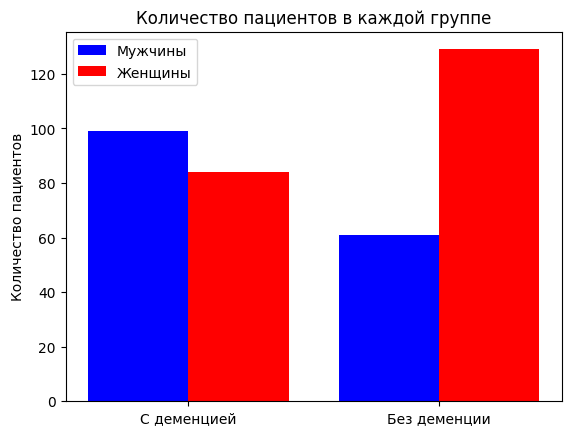

In [11]:
diagnoses = ['C деменцией', 'Без деменции']

X_axis = np.arange(len(diagnoses))

plt.bar(X_axis - 0.2, male_diagnoses, 0.4, label = 'Мужчины', color='blue')
plt.bar(X_axis + 0.2, female_diagnoses, 0.4, label = 'Женщины', color='red')

plt.xticks(X_axis, diagnoses)
plt.ylabel("Количество пациентов")
plt.title("Количество пациентов в каждой группе")
plt.legend()
plt.show()
# plt.savefig("male_female_count.png")

In [12]:
demented_nwbv = mri_csv.loc[mri_csv['Group'] != 'Nondemented', 'nWBV']
non_demented_nwbv = mri_csv.loc[mri_csv['Group'] == 'Nondemented', 'nWBV']

print(demented_nwbv)
print(non_demented_nwbv)

2      0.736
3      0.713
4      0.701
10     0.748
11     0.727
       ...  
365    0.733
366    0.708
367    0.711
368    0.694
369    0.675
Name: nWBV, Length: 183, dtype: float64
0      0.696
1      0.681
5      0.710
6      0.718
7      0.712
       ...  
363    0.740
364    0.723
370    0.801
371    0.796
372    0.801
Name: nWBV, Length: 190, dtype: float64


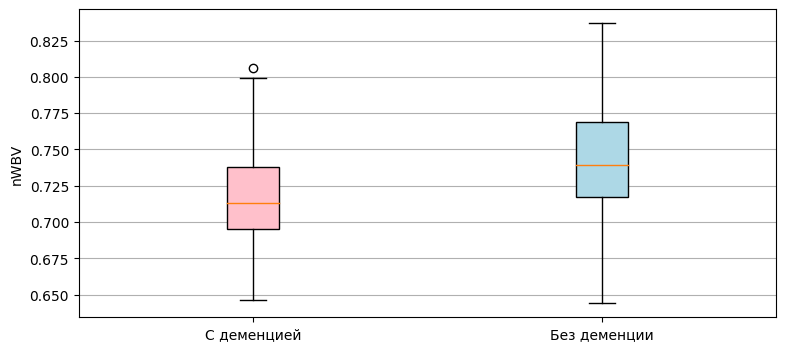

In [139]:
data = [demented_nwbv, non_demented_nwbv]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

# Display the plot
plt.ylabel("nWBV")

bplot = ax.boxplot(data,
                     vert=True,
                     patch_artist=True,
                     labels=['С деменцией', 'Без деменции'])

colors = ['pink', 'lightblue']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.yaxis.grid(True)

# plt.savefig("nWBV.png")

In [47]:
print(data)

[2      0.736
3      0.713
4      0.701
10     0.748
11     0.727
       ...  
365    0.733
366    0.708
367    0.711
368    0.694
369    0.675
Name: nWBV, Length: 183, dtype: float64, 0      0.696
1      0.681
5      0.710
6      0.718
7      0.712
       ...  
363    0.740
364    0.723
370    0.801
371    0.796
372    0.801
Name: nWBV, Length: 190, dtype: float64]


In [110]:
demented_mmse = mri_csv.loc[mri_csv['Group'] != 'Nondemented', 'MMSE'].values
non_demented_mmse = mri_csv.loc[mri_csv['Group'] == 'Nondemented', 'MMSE'].values

demented_mmse = demented_mmse[~np.isnan(demented_mmse)]

In [111]:
np.percentile(demented_mmse, 1)

13.4

In [148]:
data = [demented_mmse, non_demented_mmse]
data

[array([23., 28., 22., 28., 27., 27., 27., 24., 30., 29., 21., 16., 25.,
        23., 30., 29., 27., 29., 28., 26., 26., 25., 21., 21., 27., 27.,
        22., 21., 30., 30., 28., 21., 24., 27., 29., 26., 26., 26., 25.,
        25., 27., 23., 27., 28., 28., 26., 26., 21., 15., 22., 20., 22.,
        19., 21., 19.,  7.,  4., 20., 17., 29., 24., 30., 26., 29., 29.,
        28., 30., 27., 23., 26., 18., 30., 30., 27., 28., 25., 22., 23.,
        16., 16., 25., 30., 28., 26., 26., 26., 21., 21., 20., 29., 27.,
        28., 27., 30., 28., 27., 23., 29., 29., 30., 30., 30., 30., 25.,
        17., 22., 21., 25., 27., 17., 17., 27., 20., 23., 28., 27., 27.,
        27., 28., 30., 26., 25., 15., 29., 27., 29., 29., 29., 29., 30.,
        30., 25., 29., 28., 29., 28., 28., 30., 29., 29., 26., 27., 25.,
        30., 30., 30., 29., 20., 20., 30., 27., 19., 18., 29., 28., 27.,
        29., 23., 22., 23., 25., 23., 17., 30., 29., 26., 28., 28., 30.,
        30., 30., 26., 26., 26., 23., 20., 24., 21.

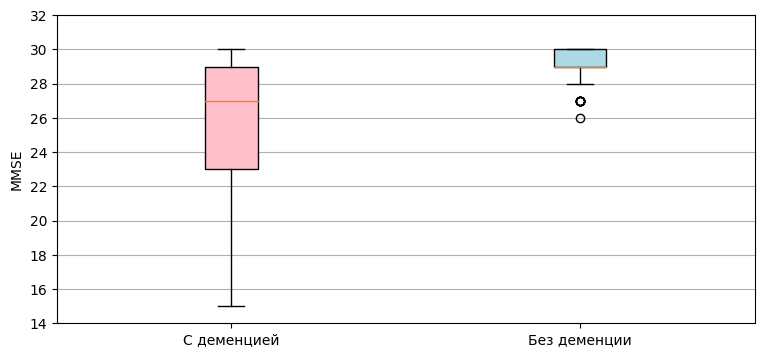

In [149]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

# Display the plot
plt.ylabel("MMSE")
plt.ylim(14, 32)

bplot = ax.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=['С деменцией', 'Без деменции'])  # will be used to label x-ticks

colors = ['pink', 'lightblue']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.yaxis.grid(True)

plt.savefig('MMSE.png')

In [143]:
demented_age = mri_csv.loc[mri_csv['Group'] != 'Nondemented', 'Age']
non_demented_age = mri_csv.loc[mri_csv['Group'] == 'Nondemented', 'Age']

print(demented_age)
print(non_demented_age)

2      75
3      76
4      80
10     71
11     73
       ..
365    72
366    73
367    80
368    82
369    86
Name: Age, Length: 183, dtype: int64
0      87
1      88
5      88
6      90
7      80
       ..
363    68
364    72
370    61
371    63
372    65
Name: Age, Length: 190, dtype: int64


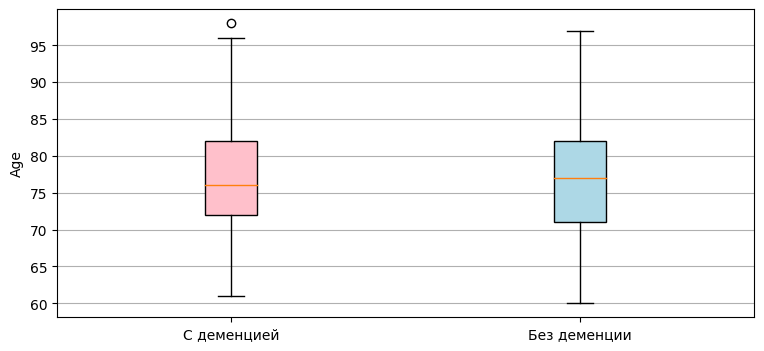

In [145]:
data = [demented_age, non_demented_age]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

# Display the plot
plt.ylabel("Age")

bplot = ax.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=['С деменцией', 'Без деменции'])  # will be used to label x-ticks

colors = ['pink', 'lightblue']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.yaxis.grid(True)

# plt.savefig("age_distr.png")

In [134]:
ages = mri_csv['Age']
print(ages)

0      87
1      88
2      75
3      76
4      80
       ..
368    82
369    86
370    61
371    63
372    65
Name: Age, Length: 373, dtype: int64


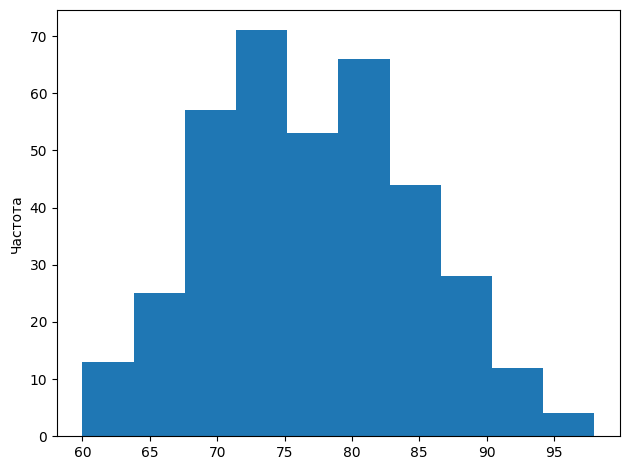

In [146]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

plt.ylabel('Частота')

# We can set the number of bins with the *bins* keyword argument.
axs.hist(ages)
# plt.savefig('age_hist.png')